In [1]:
import os
import torch
import random
import pickle
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from code import bayesian_optimization_loop_EI
from code import data_load

## FABO

In [2]:
warnings.filterwarnings('ignore')
nb_iterations = 250 
nb_initialization = 10
min_features = 5
max_features = 20
FABO = True
which_acquisition = "EI"   # "max y_hat" or "max sigma"
FS_method = 'spearman'
n_seed = 19
seeds = random.sample(range(11, 3000), n_seed)
path = "data/CoRE2019_1600000.csv"
label="pure_uptake_CO2_298.00_1600000"

In [3]:
for i in range(0,len(seeds)):
    path = "data/CoRE2019_1600000.csv"
    to_drop=["Unnamed:0","MOFname"]
    label="pure_uptake_CO2_298.00_1600000"
    X,y =  data_load.read_data(path,standardize=True,to_drop=to_drop,label=label)
    nb_MOFs = len(X.index)

    # Set Random Seed
    seed = seeds[i]
    np.random.seed(seed)
    torch.manual_seed(seed)

    experiment_name = path.split("/")[1].split(".")[0] + "_".format(nb_initialization) + "_seed_{}".format(seed)
    print(experiment_name)
    o, rank, ids_acquired, feature_count, plot_info = bayesian_optimization_loop_EI.main(X,y,nb_MOFs, nb_iterations, 
                                                                                     nb_initialization, 
                                                                                     which_acquisition, 
                                                                                     min_features, max_features, 
                                                                                     FABO, experiment_name, 
                                                                                     cross_val_stats=True, 
                                                                                     FS_method = FS_method)


StandardScaler()
CoRE2019_1600000__seed_260
# MOFs in initialization: 10
took time t =  7.884213527043661 min

StandardScaler()
CoRE2019_1600000__seed_391
# MOFs in initialization: 10
took time t =  18.643158276875813 min

StandardScaler()
CoRE2019_1600000__seed_451
# MOFs in initialization: 10
took time t =  9.651887019475302 min

StandardScaler()
CoRE2019_1600000__seed_628
# MOFs in initialization: 10
took time t =  9.504870176315308 min

StandardScaler()
CoRE2019_1600000__seed_805
# MOFs in initialization: 10
took time t =  9.740564823150635 min

StandardScaler()
CoRE2019_1600000__seed_1016
# MOFs in initialization: 10
took time t =  9.707191785176596 min

StandardScaler()
CoRE2019_1600000__seed_1390
# MOFs in initialization: 10
took time t =  7.581273714701335 min

StandardScaler()
CoRE2019_1600000__seed_1399
# MOFs in initialization: 10
took time t =  8.423768281936646 min

StandardScaler()
CoRE2019_1600000__seed_1400
# MOFs in initialization: 10
took time t =  11.70710523923238 m

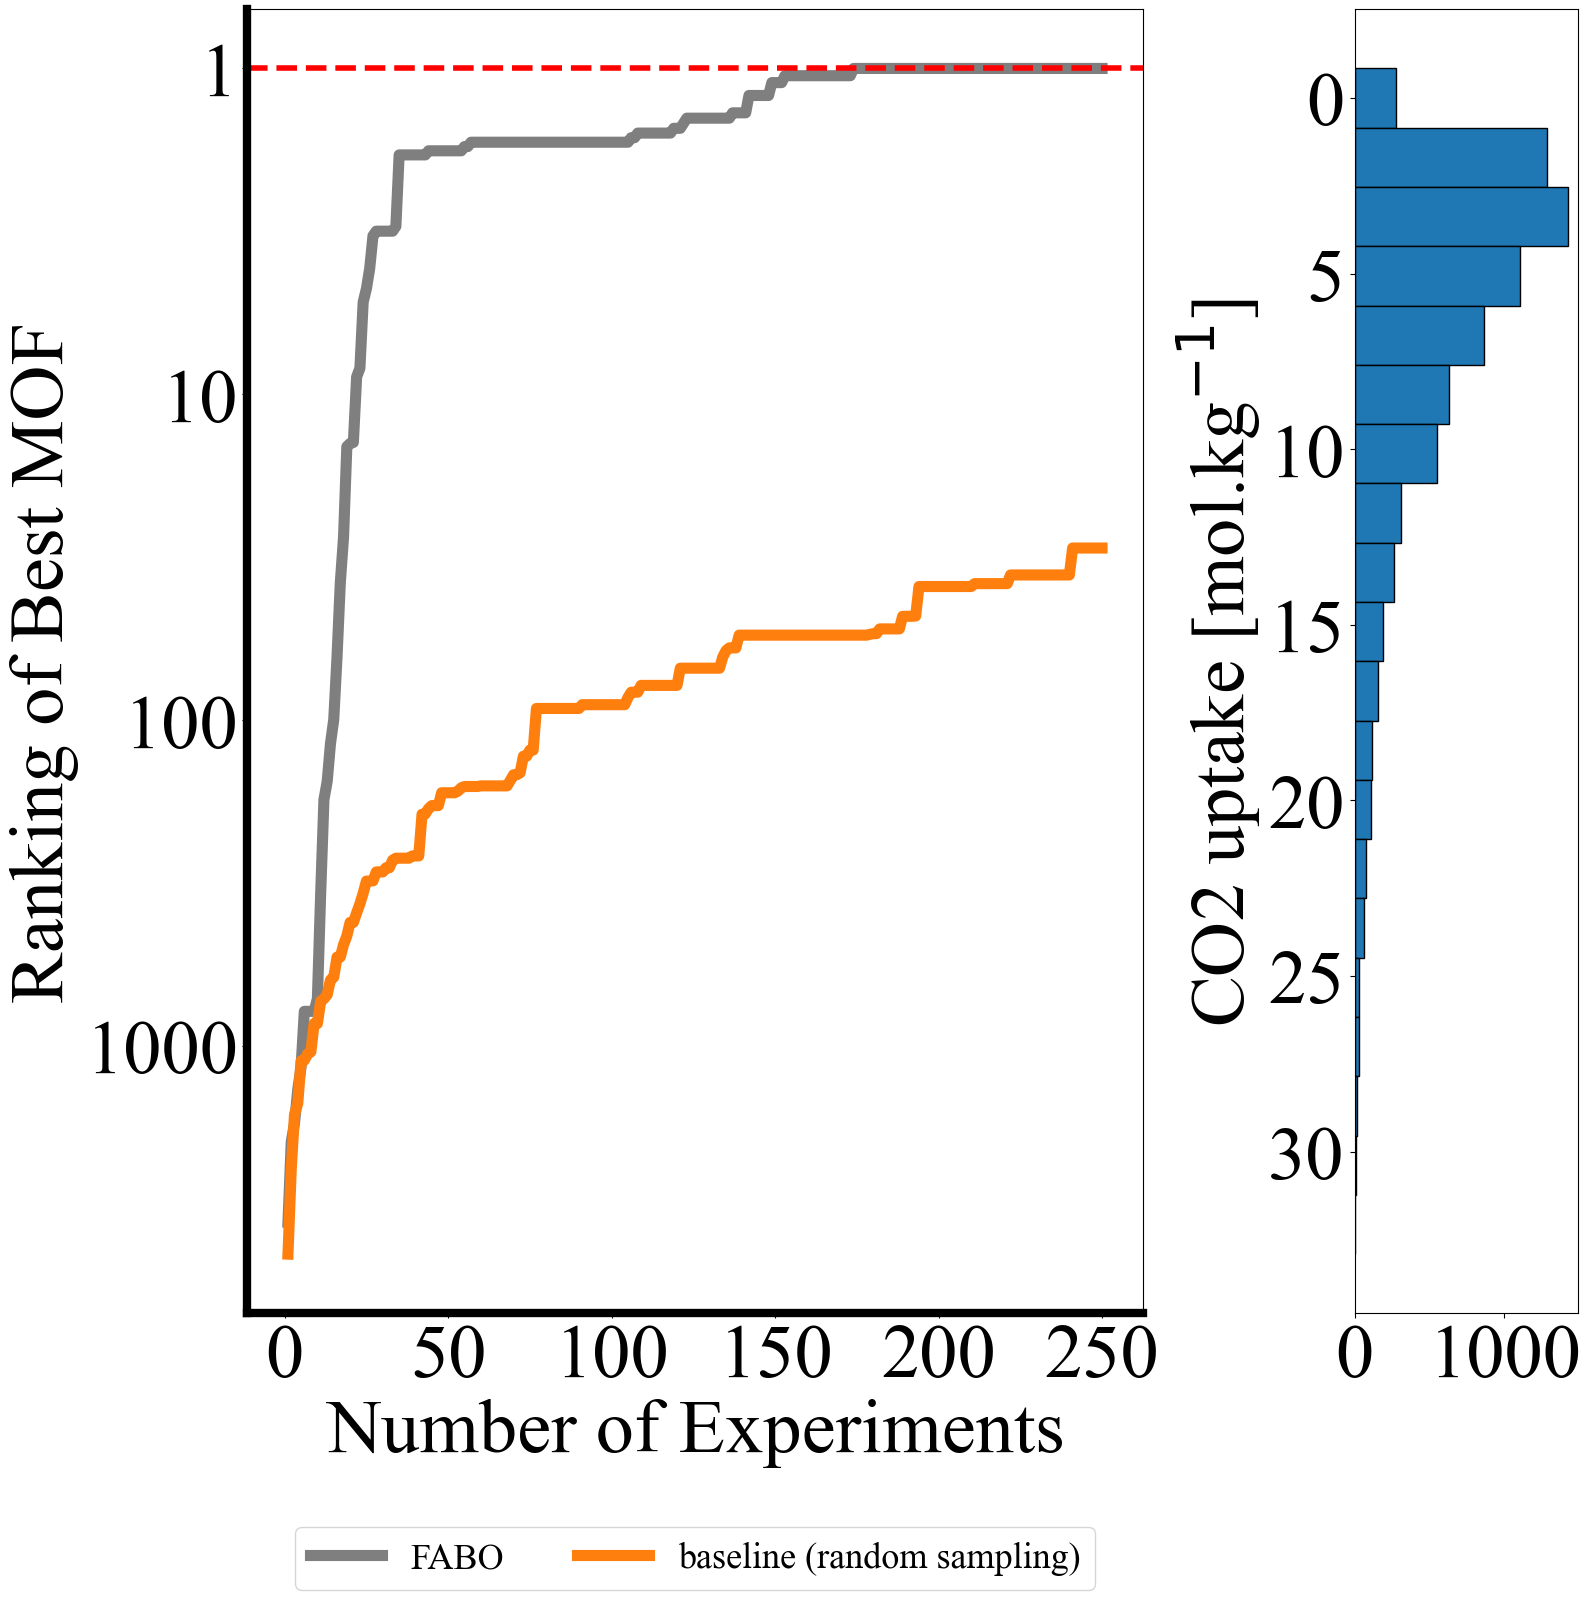

In [8]:
# FABO Data

directory = 'Pickle_files/core160'
rank_avg, rank_dict, id_dict, id_methods = {}, {}, {}, {}
for filename in os.listdir(directory):
    if filename.endswith('.pkl'):
        file_path = os.path.join(directory, filename)
        seed_value = filename.split('_seed_')[-1].split('.')[0]
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
        id_dict[seed_value] = data['IDS']
        rank_dict[seed_value] = data['Rank']
rank_avg['FABO'] = pd.DataFrame(rank_dict).mean(axis = 1)+1
id_methods['FABO'] = pd.DataFrame(id_dict)


################################################################################################################

# Baseline (Random Sampling) Data
rank_avg['baseline (random sampling)'], id_methods['baseline (random sampling)'] = bayesian_optimization_loop_EI.baseline (path, label, nb_iterations, n_seed)


################################################################################################################
df_CORE160 = pd.read_csv(path)
CO2_uptake = list(df_CORE160[label].values) 
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
X = np.arange(1, nb_iterations + 1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 16), gridspec_kw={'width_ratios': [4, 1]})
colors = ['#7f7f7f', '#ff7f0e',] 

for i, FS in enumerate(rank_avg.keys()):
    y = rank_avg[FS]
    ax1.plot(X, y, label=FS, c=colors[i], linewidth=8)    
    
ax1.set_xlabel('Number of Experiments', fontsize = 55)
ax1.set_ylabel('Ranking of Best MOF', fontsize = 55)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=26)
ax1.grid(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)
ax1.spines['bottom'].set_linewidth(6) 
ax1.spines['left'].set_linewidth(6) 
ax1.spines['bottom'].set_color('black') 
ax1.spines['left'].set_color('black')  
ax1.set_yscale('log')
ax1.axhline(y=1, color='r', linestyle='--', label='Rank 1', linewidth = 4)
ax1.invert_yaxis()
ax1.get_yaxis().set_major_formatter(ScalarFormatter())
ax1.tick_params(axis='both', which='major', labelsize=55)
ax1.set_xticks([0, 50, 100, 150, 200, 250])  # Define where to place the ticks
counts, bins = np.histogram(CO2_uptake, bins=20)
ax2.barh(bins[:-1], counts, height=np.diff(bins), color='#1f77b4', edgecolor='black')
ax2.set_ylabel('CO2 uptake [mol.kg$^{-1}$]', fontsize=55)
ax2.set_xscale('linear')
ax2.invert_yaxis()
ax2.tick_params(axis='both', which='major', labelsize=55)
ax2.grid(False)
plt.tight_layout()  
plt.show()


## Benchmarking with random forest


In [7]:
from code import bayesian_optimization_RF

warnings.filterwarnings('ignore')
nb_iterations = 250 
nb_initialization = 10
seeds = [88,212,267,555,800,868,1008,1074,1213,1339,1436,1602,1944,2023,2225,2592,2606,2664,2787,2913]

for i in range(0,len(seeds)):

    path = "data/CoRE2019_15000.csv"
    to_drop=["Unnamed: 0","MOFname"]
    label="pure_uptake_CO2_298.00_15000"
    
    X,y =  data_load.read_data(path,standardize=True,to_drop=to_drop,label=label)
    nb_MOFs = len(X.index)

    # Set Random Seed
    seed = seeds[i]
    np.random.seed(seed)
    torch.manual_seed(seed)

    experiment_name = f"{i}"
    print(experiment_name)
    o, rank, ids_acquired, plot_info = bayesian_optimization_RF.main(X,y,nb_MOFs, nb_iterations, 
                                                                                     nb_initialization, 
                                                                                    experiment_name)




StandardScaler()
0
# MOFs in initialization: 10
took time t =  1.448771556218465 min

StandardScaler()
1
# MOFs in initialization: 10
took time t =  1.4717872937520344 min

StandardScaler()
2
# MOFs in initialization: 10
took time t =  1.449788014094035 min

StandardScaler()
3
# MOFs in initialization: 10
took time t =  1.4096570014953613 min

StandardScaler()
4
# MOFs in initialization: 10
took time t =  1.43478790918986 min

StandardScaler()
5
# MOFs in initialization: 10
took time t =  1.4465896288553874 min

StandardScaler()
6
# MOFs in initialization: 10
took time t =  1.4400966962178547 min

StandardScaler()
7
# MOFs in initialization: 10
took time t =  1.4083075523376465 min

StandardScaler()
8
# MOFs in initialization: 10
took time t =  1.4203166961669922 min

StandardScaler()
9
# MOFs in initialization: 10
took time t =  1.4270206292470298 min

StandardScaler()
10
# MOFs in initialization: 10
took time t =  1.4413925011952717 min

StandardScaler()
11
# MOFs in initialization: 

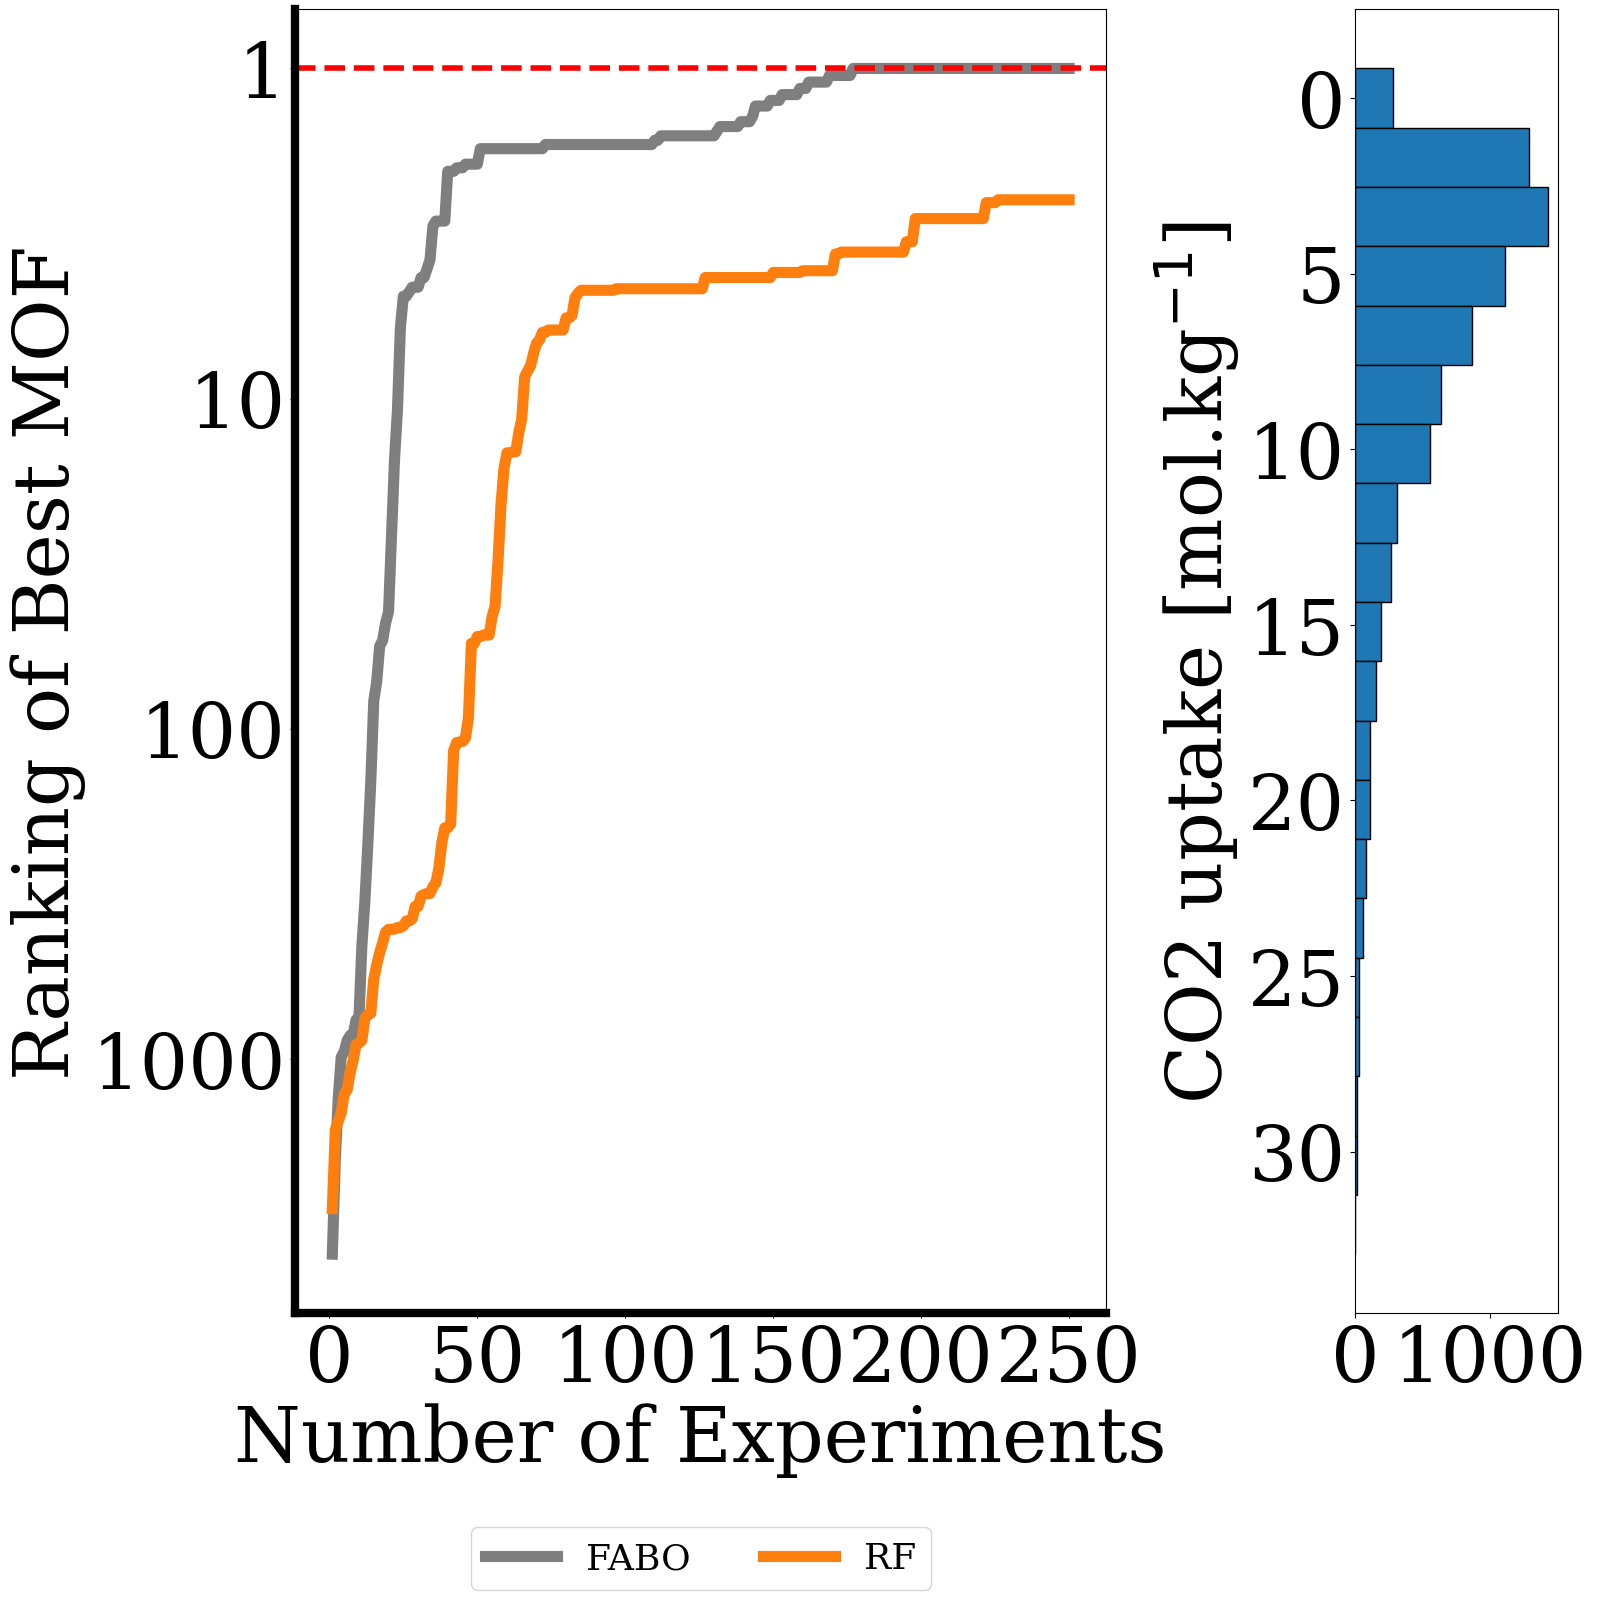

In [28]:
# FABO Data

directory = 'Pickle_files/Fabo_core160'
rank_avg, rank_dict, id_dict, id_methods = {}, {}, {}, {}
for filename in os.listdir(directory):
    if filename.endswith('.pkl'):
        file_path = os.path.join(directory, filename)
        seed_value = filename.split('_seed_')[-1].split('.')[0]
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
        id_dict[seed_value] = data['IDS']
        rank_dict[seed_value] = data['Rank']
rank_avg['FABO'] = pd.DataFrame(rank_dict).mean(axis = 1)+1
id_methods['FABO'] = pd.DataFrame(id_dict)


################################################################################################################

directory = 'Pickle_files/RF_core160'
rank_dict , id_dict = {}, {}
for filename in os.listdir(directory):
    if filename.endswith('.pkl'):
        file_path = os.path.join(directory, filename)
        seed_value = filename.split('_seed_')[-1].split('.')[0]
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
        id_dict[seed_value] = data['IDS']
        rank_dict[seed_value] = data['Rank']
rank_avg['RF'] = pd.DataFrame(rank_dict).mean(axis = 1)+1
id_methods['RF'] = pd.DataFrame(id_dict)
################################################################################################################


df_CORE160 = pd.read_csv(path)
CO2_uptake = list(df_CORE160[label].values) 
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
X = np.arange(1, nb_iterations + 1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 16), gridspec_kw={'width_ratios': [4, 1]})
colors = ['#7f7f7f', '#ff7f0e',] 

for i, FS in enumerate(rank_avg.keys()):
    y = rank_avg[FS]
    ax1.plot(X, y, label=FS, c=colors[i], linewidth=8)    
    
ax1.set_xlabel('Number of Experiments', fontsize = 55)
ax1.set_ylabel('Ranking of Best MOF', fontsize = 55)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=26)
ax1.grid(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)
ax1.spines['bottom'].set_linewidth(6) 
ax1.spines['left'].set_linewidth(6) 
ax1.spines['bottom'].set_color('black') 
ax1.spines['left'].set_color('black')  
ax1.set_yscale('log')
ax1.axhline(y=1, color='r', linestyle='--', label='Rank 1', linewidth = 4)
ax1.invert_yaxis()
ax1.get_yaxis().set_major_formatter(ScalarFormatter())
ax1.tick_params(axis='both', which='major', labelsize=55)
ax1.set_xticks([0, 50, 100, 150, 200, 250])  # Define where to place the ticks
counts, bins = np.histogram(CO2_uptake, bins=20)
ax2.barh(bins[:-1], counts, height=np.diff(bins), color='#1f77b4', edgecolor='black')
ax2.set_ylabel('CO2 uptake [mol.kg$^{-1}$]', fontsize=55)
ax2.set_xscale('linear')
ax2.invert_yaxis()
ax2.tick_params(axis='both', which='major', labelsize=55)
ax2.grid(False)
plt.tight_layout()  
plt.show()


## Benchmarking with REMBO

In [9]:
import os
import torch
import random
import pickle
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from code import bayesian_optimization_loop_EI
from code import bayesian_optimization_REMBO
from code import data_load
from code import bayesian_optimization_RF

warnings.filterwarnings('ignore')
nb_iterations = 250 
nb_initialization = 10
lower_dim = 30
which_acquisition = 'EI'
seeds = [182,253,523,855,969,1038,1224,1400,1842,1987,2069,2515,2612,2613,2637,2638,2791,2792,2890,2891]

for i in range(0,len(seeds)):

    path = "data/CoRE2019_1600000.csv"
    to_drop=["Unnamed: 0","MOFname"]
    label="pure_uptake_CO2_298.00_1600000"
    
    X,y =  data_load.read_data(path,standardize=True,to_drop=to_drop,label=label)
    nb_MOFs = len(X.index)

    seed = seeds[i]
    np.random.seed(seed)
    torch.manual_seed(seed)

    experiment_name = f"{i}"
    print(experiment_name)
    o, rank, ids_acquired, plot_info = bayesian_optimization_REMBO.main(X,y,nb_MOFs, nb_iterations, nb_initialization, 
                                                                        which_acquisition, experiment_name, cross_val_stats=False, i = 1, lower_dim = lower_dim)




StandardScaler()
0
# MOFs in initialization: 10
took time t =  0.794996420542399 min

StandardScaler()
1
# MOFs in initialization: 10
took time t =  0.4375167687733968 min

StandardScaler()
2
# MOFs in initialization: 10
took time t =  0.4611480236053467 min

StandardScaler()
3
# MOFs in initialization: 10
took time t =  0.38748184839884436 min

StandardScaler()
4
# MOFs in initialization: 10
took time t =  0.9423327445983888 min

StandardScaler()
5
# MOFs in initialization: 10
took time t =  0.4116368293762207 min

StandardScaler()
6
# MOFs in initialization: 10
took time t =  0.33906181653340656 min

StandardScaler()
7
# MOFs in initialization: 10
took time t =  0.3862448533376058 min

StandardScaler()
8
# MOFs in initialization: 10
took time t =  0.37014325459798175 min

StandardScaler()
9
# MOFs in initialization: 10
took time t =  0.47166665395100915 min

StandardScaler()
10
# MOFs in initialization: 10
took time t =  0.690853993097941 min

StandardScaler()
11
# MOFs in initializa

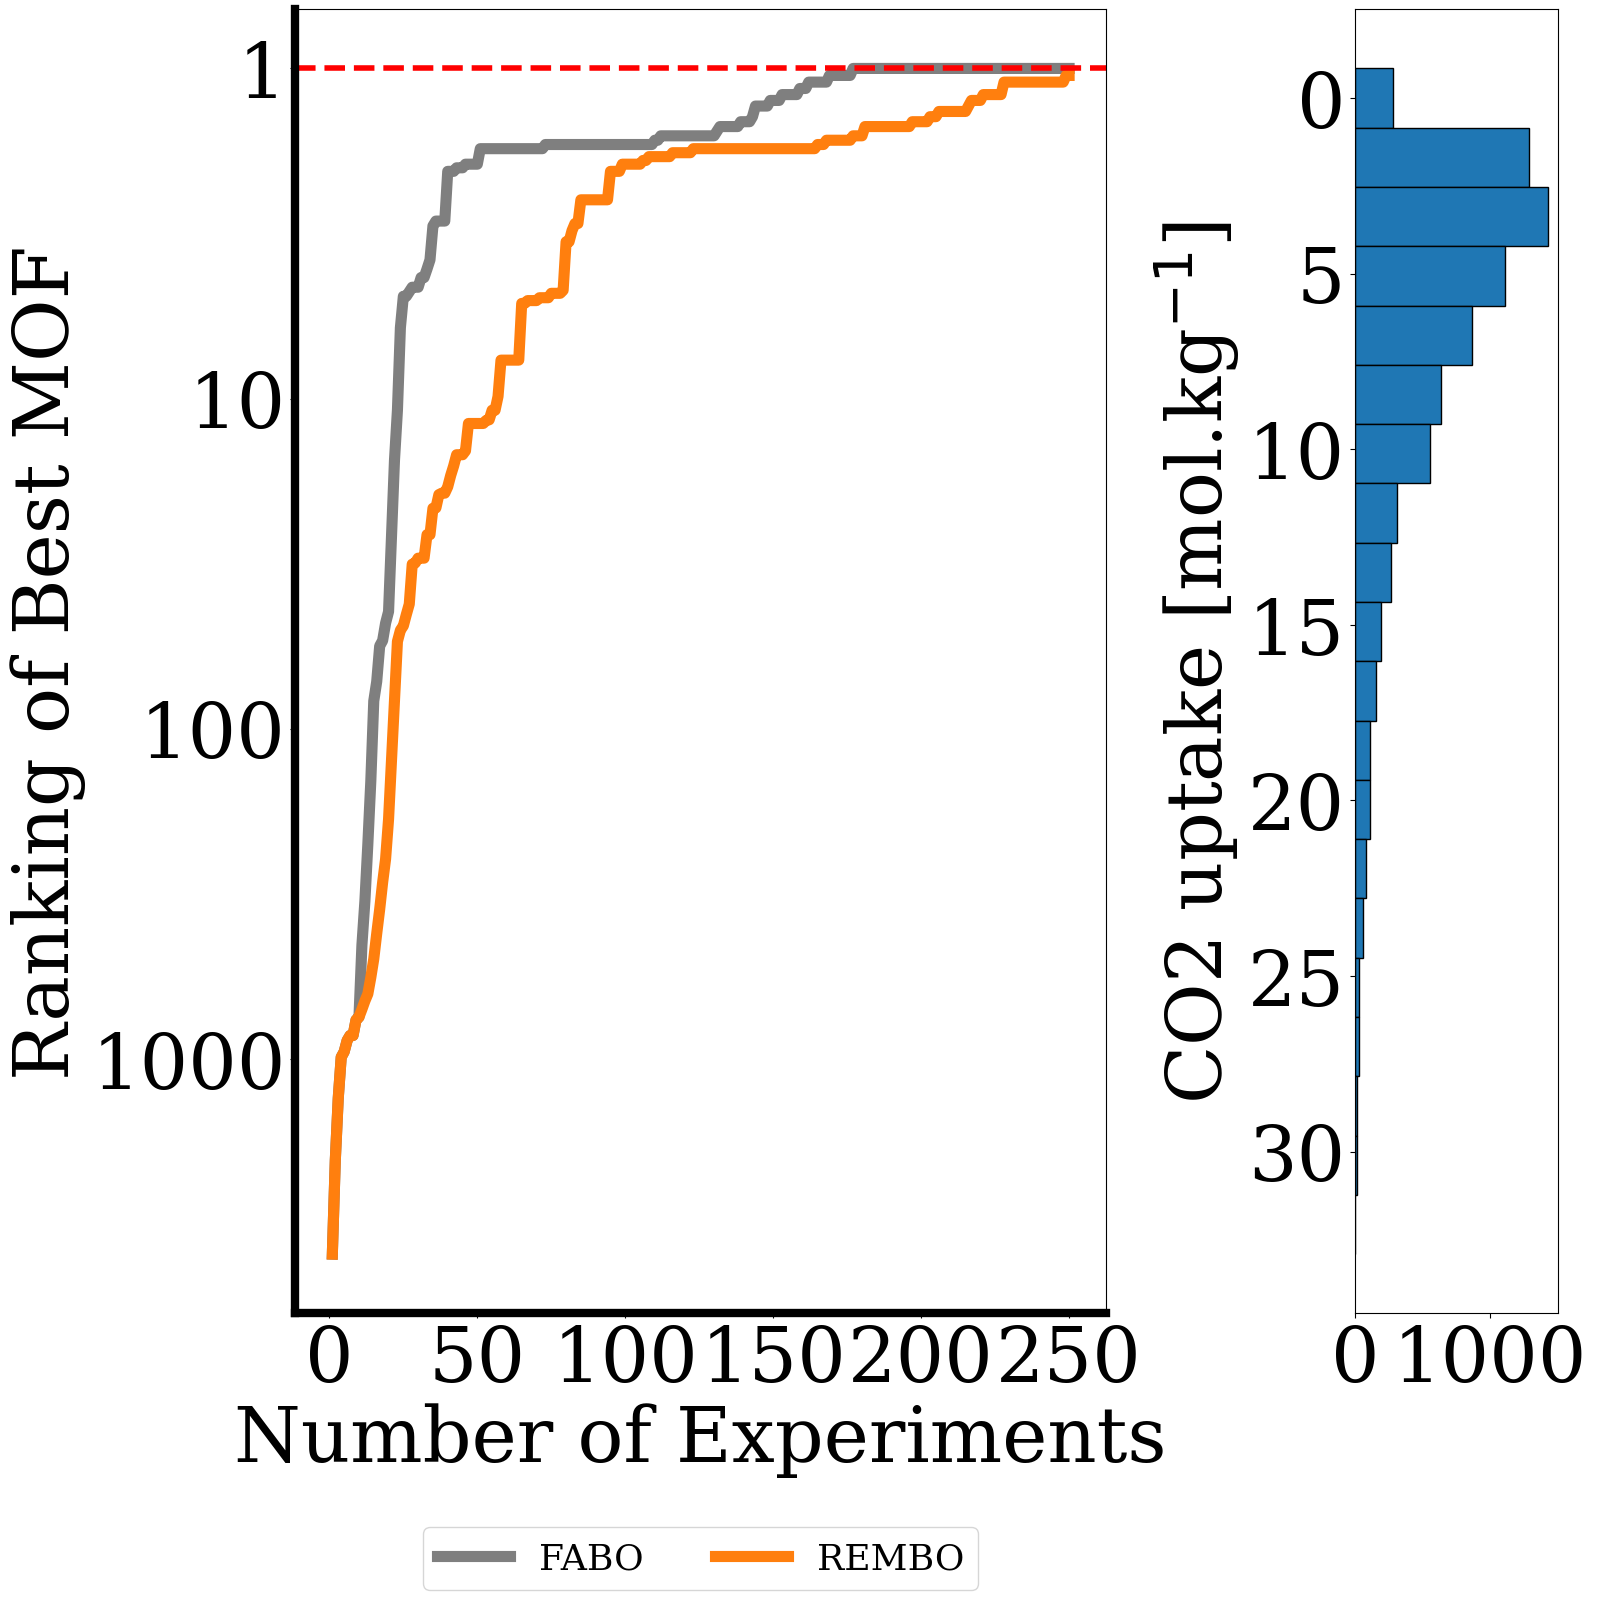

In [32]:
# FABO Data

directory = 'Pickle_files/Fabo_core160'
rank_avg, rank_dict, id_dict, id_methods = {}, {}, {}, {}
for filename in os.listdir(directory):
    if filename.endswith('.pkl'):
        file_path = os.path.join(directory, filename)
        seed_value = filename.split('_seed_')[-1].split('.')[0]
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
        id_dict[seed_value] = data['IDS']
        rank_dict[seed_value] = data['Rank']
rank_avg['FABO'] = pd.DataFrame(rank_dict).mean(axis = 1)+1
id_methods['FABO'] = pd.DataFrame(id_dict)


################################################################################################################

directory = 'Pickle_files/REMBO_core160'
rank_dict , id_dict = {}, {}
for filename in os.listdir(directory):
    if filename.endswith('.pkl'):
        file_path = os.path.join(directory, filename)
        seed_value = filename.split('_seed_')[-1].split('.')[0]
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
        id_dict[seed_value] = data['IDS']
        rank_dict[seed_value] = data['Rank']
rank_avg['REMBO'] = pd.DataFrame(rank_dict).mean(axis = 1)+1
id_methods['REMBO'] = pd.DataFrame(id_dict)
################################################################################################################


df_CORE160 = pd.read_csv(path)
CO2_uptake = list(df_CORE160[label].values) 
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
X = np.arange(1, nb_iterations + 1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 16), gridspec_kw={'width_ratios': [4, 1]})
colors = ['#7f7f7f', '#ff7f0e',] 

for i, FS in enumerate(rank_avg.keys()):
    y = rank_avg[FS]
    ax1.plot(X, y, label=FS, c=colors[i], linewidth=8)    
    
ax1.set_xlabel('Number of Experiments', fontsize = 55)
ax1.set_ylabel('Ranking of Best MOF', fontsize = 55)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=26)
ax1.grid(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)
ax1.spines['bottom'].set_linewidth(6) 
ax1.spines['left'].set_linewidth(6) 
ax1.spines['bottom'].set_color('black') 
ax1.spines['left'].set_color('black')  
ax1.set_yscale('log')
ax1.axhline(y=1, color='r', linestyle='--', label='Rank 1', linewidth = 4)
ax1.invert_yaxis()
ax1.get_yaxis().set_major_formatter(ScalarFormatter())
ax1.tick_params(axis='both', which='major', labelsize=55)
ax1.set_xticks([0, 50, 100, 150, 200, 250])  # Define where to place the ticks
counts, bins = np.histogram(CO2_uptake, bins=20)
ax2.barh(bins[:-1], counts, height=np.diff(bins), color='#1f77b4', edgecolor='black')
ax2.set_ylabel('CO2 uptake [mol.kg$^{-1}$]', fontsize=55)
ax2.set_xscale('linear')
ax2.invert_yaxis()
ax2.tick_params(axis='both', which='major', labelsize=55)
ax2.grid(False)
plt.tight_layout()  
plt.show()
